In [1]:
import numpy as np
from functools import reduce
from collections import namedtuple
from typing import List, Tuple, Union
import json

MAXSIDE = 100
MAXAREA = 40 * 40
MAXPIXELS = 40 * 40 * 5

import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src', 'arclang')))
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from image import Image, Point
from function import *
from dsl import *

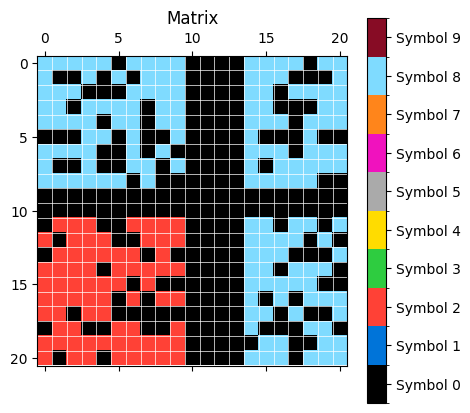

In [2]:
path = "/home/sai/Desktop/arc/ARC-AGI/data/training/0b148d64.json"
with open(path,"r") as f:
    data_ce9 = json.loads(f.read())
img_mask = data_ce9["train"][0]["input"]
img_mask = np.array(img_mask)
y,x = img_mask.shape
input_img= Image(0,0,x,y,img_mask)
display_matrix(input_img)

In [3]:
from collections import Counter

In [4]:
# sizes = Counter([i.majority_col() for i in all_comp])
# sizes.most_common()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

def display_matrices(matrices_dict):
    # Extract matrices from the dictionary
    matrix_input = matrices_dict['input'].mask
    matrix_output = matrices_dict['predicted_ouput'].mask

    # Define the custom color map
    colors = [
        "#000000",  # black
        "#0074D9",  # blue
        "#FF4136",  # red
        "#2ECC40",  # green
        "#FFDC00",  # yellow
        "#AAAAAA",  # grey
        "#F012BE",  # fuchsia
        "#FF851B",  # orange
        "#7FDBFF",  # teal
        "#870C25",  # brown
    ]
    cmap = ListedColormap(colors)
    bounds = np.arange(-0.5, 10, 1)
    norm = BoundaryNorm(bounds, cmap.N)

    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the input matrix
    cax1 = ax1.matshow(matrix_input, cmap=cmap, norm=norm)
    ax1.set_title('Input Matrix')

    # Plot the output matrix
    cax2 = ax2.matshow(matrix_output, cmap=cmap, norm=norm)
    ax2.set_title('predicted_ouput Matrix')

    # Add a single colorbar for both matrices
    fig.colorbar(cax1, ax=[ax1, ax2], ticks=np.arange(0, 10), orientation='vertical').ax.set_yticklabels([
        'Symbol 0', 'Symbol 1', 'Symbol 2', 'Symbol 3', 
        'Symbol 4', 'Symbol 5', 'Symbol 6', 'Symbol 7', 
        'Symbol 8', 'Symbol 9'
    ])

    # Display the plot
    plt.show()

In [9]:
def q_0b148d64(input_img):
    all_comp = input_img.list_components("dfs",True)
    sizes = [i.majority_col() for i in all_comp]
    c = Counter(sizes).most_common()[-1][0]
    return all_comp[sizes.index(c)] 

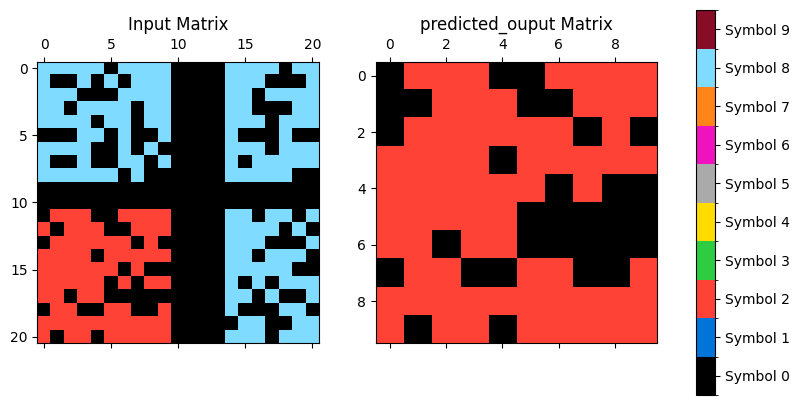

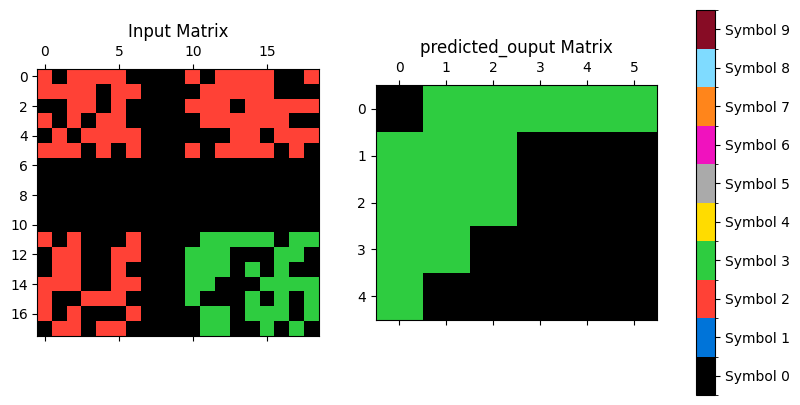

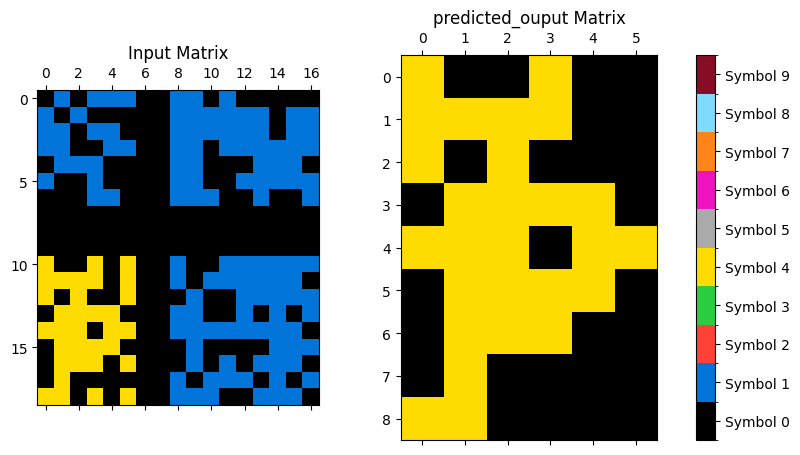

In [10]:
for i in data_ce9["train"]:
    img_mask = i["input"]
    img_mask = np.array(img_mask)
    y,x = img_mask.shape
    input_img= Image(0,0,x,y,img_mask)
    display_matrices({"input":input_img,"predicted_ouput": q_0b148d64(input_img)})

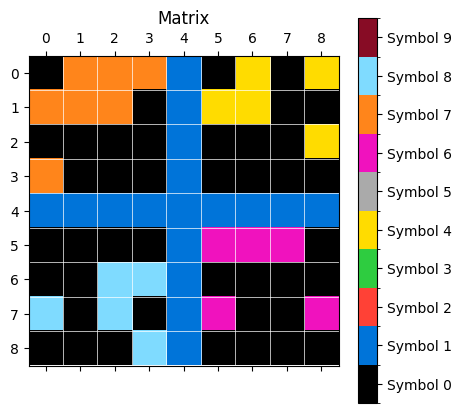

In [11]:
path = "/home/sai/Desktop/arc/ARC-AGI/data/training/a68b268e.json"
with open(path,"r") as f:
    data_ce9 = json.loads(f.read())
img_mask = data_ce9["train"][0]["input"]
img_mask = np.array(img_mask)
y,x = img_mask.shape
input_img= Image(0,0,x,y,img_mask)
display_matrix(input_img)

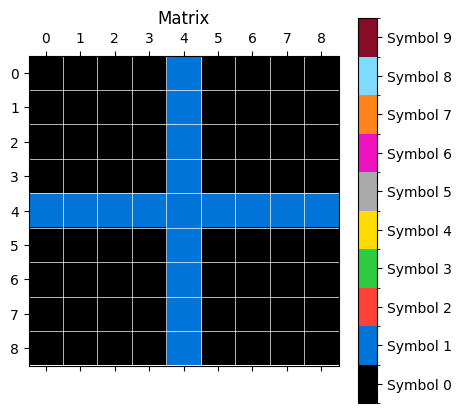

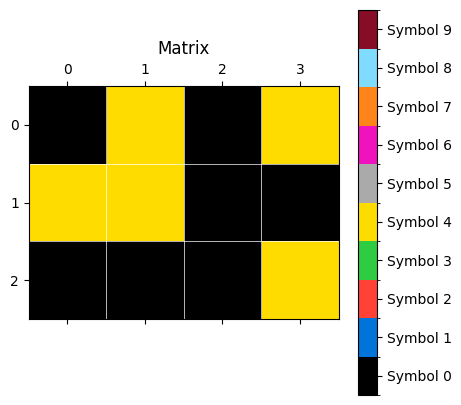

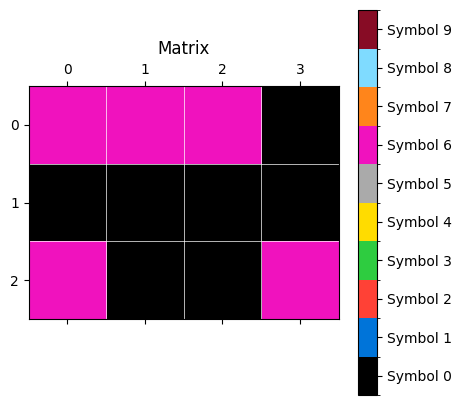

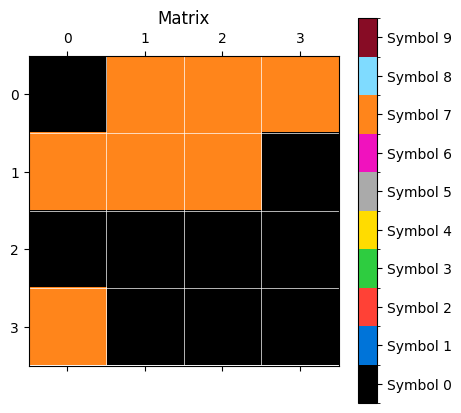

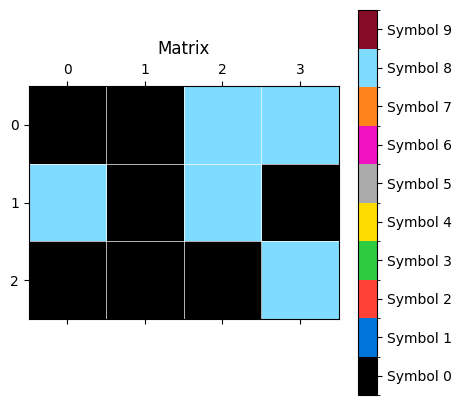

[None, None, None, None, None]

In [15]:
[display_matrix(i) for i in input_img.list_components("partition",True)]

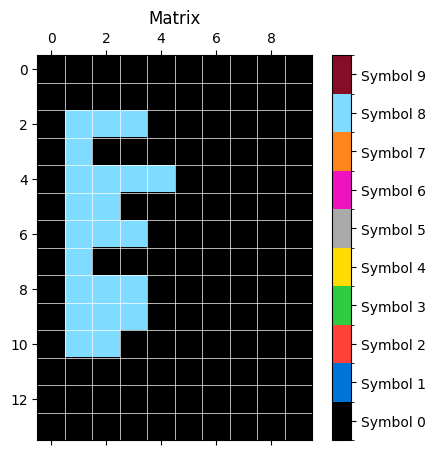

In [16]:
path = "/home/sai/Desktop/arc/ARC-AGI/data/training/6d75e8bb.json"
with open(path,"r") as f:
    data_ce9 = json.loads(f.read())
img_mask = data_ce9["train"][0]["input"]
img_mask = np.array(img_mask)
y,x = img_mask.shape
input_img= Image(0,0,x,y,img_mask)
display_matrix(input_img)

In [ ]:
img_mask.shape

(9, 9)

In [17]:
img_mask

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 8, 8, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 8, 8, 8, 0, 0, 0, 0, 0],
       [0, 8, 8, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 8, 8, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 8, 8, 0, 0, 0, 0, 0, 0],
       [0, 8, 8, 8, 0, 0, 0, 0, 0, 0],
       [0, 8, 8, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [28]:
def solve_0ca9ddb6(input_grid):
    input_image = Image(0, 0, len(input_grid[0]), len(input_grid), np.array(input_grid))
    components = input_image.list_components()
    
    result_components = []
    for component in components:
        value = component.majority_col()
        pattern = create_pattern(value)
        centered_pattern = center_pattern(pattern, component)
        result_components.append(centered_pattern)
    
    result_image = combine_images([(comp, Point(comp.x, comp.y)) for comp in result_components])
    result_image = extend(result_image, input_image)
    
    return result_image

def create_pattern(value):
    if value == 2:  # Red
        pattern = Image.empty(0, 0, 3, 3)
        pattern.mask[0, 0] = pattern.mask[1, 1] = pattern.mask[2, 2] = 2
        pattern.mask[0, 2] = pattern.mask[2, 0] = 2
    elif value in [3, 4]:  # Blue or Yellow
        pattern = Image.empty(0, 0, 3, 3)
        pattern.mask[0, 1] = pattern.mask[1, 0] = pattern.mask[1, 2] = pattern.mask[2, 1] = value
        pattern.mask[1, 1] = value
    elif value == 8:  # Orange
        pattern = Image.empty(0, 0, 3, 3)
        pattern.mask[0, 1] = pattern.mask[1, 0] = pattern.mask[1, 2] = pattern.mask[2, 1] = 7
        pattern.mask[1, 1] = 8
    else:
        pattern = Image.empty(0, 0, 1, 1)
        pattern.mask[0, 0] = value
    return pattern

def center_pattern(pattern, component):
    cx, cy = component.x + component.w // 2, component.y + component.h // 2
    px, py = cx - pattern.w // 2, cy - pattern.h // 2
    centered = Image(px, py, pattern.w, pattern.h, pattern.mask)
    return centered

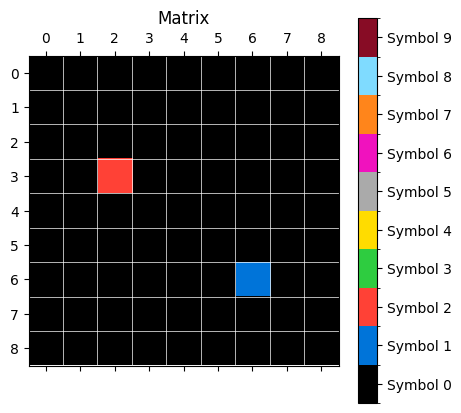

In [29]:
path = "/home/sai/Desktop/arc/ARC-AGI/data/training/0ca9ddb6.json"
with open(path,"r") as f:
    data_ce9 = json.loads(f.read())
img_mask = data_ce9["train"][0]["input"]
img_mask = np.array(img_mask)
y,x = img_mask.shape
input_img= Image(0,0,x,y,img_mask)
display_matrix(input_img)

In [34]:
def create_diagonal_pattern(size: int, color: int) -> Image:
    pattern = Image.empty(0, 0, size, size)
    for i in range(size):
        pattern[i, i] = color
        pattern[i, size - 1 - i] = color
    return pattern

def create_cross_pattern(size: int, color: int) -> Image:
    pattern = Image.empty(0, 0, size, size)
    mid = size // 2
    for i in range(size):
        pattern[mid, i] = color
        pattern[i, mid] = color
    return pattern

def create_petal_pattern(size: int, center_color: int, petal_color: int) -> Image:
    pattern = Image.empty(0, 0, size, size)
    mid = size // 2
    pattern[mid, mid] = center_color
    pattern[mid-1, mid] = petal_color
    pattern[mid+1, mid] = petal_color
    pattern[mid, mid-1] = petal_color
    pattern[mid, mid+1] = petal_color
    return pattern

In [35]:
def solve_0ca9ddb6(input_grid):
    input_image = Image(0, 0, len(input_grid[0]), len(input_grid), np.array(input_grid))
    components = input_image.list_components()
    
    result_components = []
    for component in components:
        value = component.majority_col()
        pattern = create_pattern_for_value(value)
        centered_pattern = center_pattern(pattern, component)
        result_components.append(centered_pattern)
    
    result_image = combine_images([(comp, Point(comp.x, comp.y)) for comp in result_components])
    result_image = extend(result_image, input_image)
    
    return result_image

def create_pattern_for_value(value: int) -> Image:
    if value == 2:  # Red
        return create_diagonal_pattern(3, 2)
    elif value in [3, 4]:  # Blue or Yellow
        return create_cross_pattern(3, value)
    elif value == 8:  # Orange
        return create_petal_pattern(3, 8, 7)
    else:
        return Image.full(Point(0, 0), Point(1, 1), value)

def center_pattern(pattern: Image, component: Image) -> Image:
    cx, cy = component.x + component.w // 2, component.y + component.h // 2
    px, py = cx - pattern.w // 2, cy - pattern.h // 2
    return Image(px, py, pattern.w, pattern.h, pattern.mask)

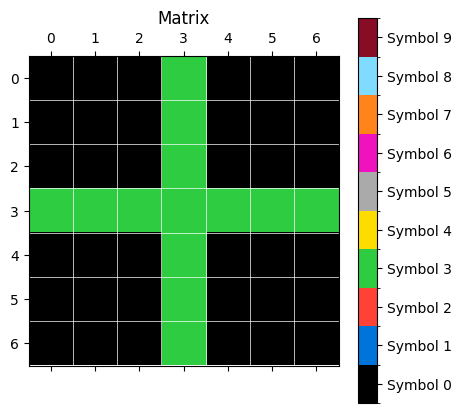

In [45]:

display_matrix(create_cross_pattern(7,3))

In [44]:

display_matrix(create_petal_pattern(7,3))

TypeError: create_petal_pattern() missing 1 required positional argument: 'petal_color'